In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import loader
import plot
import helpers
import importlib
import joblib

importlib.reload(loader)
importlib.reload(plot)
importlib.reload(helpers)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import ShuffleSplit, cross_val_score, train_test_split, StratifiedKFold, learning_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import RMSprop
from sklearn.ensemble import AdaBoostClassifier

In [3]:
data = loader.load_adult_data()
data.shape

(32561, 109)

In [4]:
features = [col for col in data.columns if col != "target"]
X = data[features]
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [5]:
# Normalize input data
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

In [5]:
basic = KNeighborsClassifier()
n_neighbors = range(2,11)
metric = ['manhattan', 'euclidean']
param_grid = dict(metric=metric, n_neighbors=n_neighbors)
grid = GridSearchCV(estimator=basic, param_grid=param_grid, return_train_score=True)
grid_result = grid.fit(X_train_norm, y_train)

In [6]:
res = grid_result.cv_results_
res_df = helpers.scikit_cv_result_to_df(res)
res_df.sort_values(by='rank_test_score')

mean_fit_time  std_fit_time  mean_score_time  \
metric    n_neighbors                                                 
euclidean 10                0.013205      0.000462         3.548152   
manhattan 10                0.013544      0.000735        23.662196   
          9                 0.014766      0.001113        23.544519   
euclidean 9                 0.013546      0.000237         3.645521   
          7                 0.014097      0.000838         3.563204   
manhattan 8                 0.014631      0.001847        23.389942   
          7                 0.014266      0.001975        23.708644   
euclidean 8                 0.013363      0.000219         3.552487   
          6                 0.014651      0.000312         3.883248   
manhattan 6                 0.013903      0.001098        22.847939   
          5                 0.014530      0.001684        23.303870   
euclidean 5                 0.015039      0.001607         3.757904   
manhattan 4                 0.014402      0.001010        22.889306   
euclidean 4                 0.015099      0.001182         3.800926   
          3                 0.014505      0.000884         3.127606   
manhattan 3                 0.016051      0.002000        23.591771   
euclidean 2                 0.014066      0.000606         2.662906   
manhattan 2                 0.015149      0.000931        22.377308   

                       std_score_time  mean_test_score  std_test_score  \
metric    n_neighbors                                                    
euclidean 10                 0.137153         0.831827        0.006761   
manhattan 10                 0.448097         0.831169        0.006254   
          9                  0.430347         0.830642        0.005662   
euclidean 9                  0.107830         0.830291        0.005249   
          7                  0.078321         0.829984        0.004483   
manhattan 8                  0.262947         0.829677        0.003646   
          7                  0.885785         0.829546        0.004083   
euclidean 8                  0.245045         0.829414        0.004414   
          6                  0.119470         0.827396        0.005050   
manhattan 6                  0.481180         0.826869        0.006127   
          5                  0.895074         0.826299        0.005066   
euclidean 5                  0.220921         0.826211        0.004392   
manhattan 4                  0.444781         0.821911        0.005227   
euclidean 4                  0.088308         0.821736        0.004191   
          3                  0.093350         0.817655        0.005493   
manhattan 3                  0.534122         0.816778        0.006678   
euclidean 2                  0.053614         0.809582        0.003457   
manhattan 2                  0.605035         0.808310        0.004086   

                       rank_test_score  mean_train_score  std_train_score  
metric    n_neighbors                                                      
euclidean 10                         1          0.857351         0.001274  
manhattan 10                         2          0.856616         0.001948  
          9                          3          0.861081         0.002318  
euclidean 9                          4          0.860905         0.002209  
          7                          5          0.866598         0.002030  
manhattan 8                          6          0.861344         0.001811  
          7                          7          0.866916         0.000957  
euclidean 8                          8          0.861168         0.001746  
          6                          9          0.865951         0.001207  
manhattan 6                         10          0.866708         0.001132  
          5                         11          0.877238         0.000896  
euclidean 5                         12          0.876590         0.000726  
manhattan 4                         13          0.876119 

In [19]:
joblib.dump(res_df, 'adult_knn_grid_cv_res_df_metric_neighbors.pkl')

['adult_knn_grid_cv_res_df_metric_neighbors.pkl']

In [7]:
res_df.sort_values(by='rank_test_score')[helpers.get_useful_cv_columns()]

mean_fit_time  mean_score_time  mean_test_score  \
metric    n_neighbors                                                    
euclidean 10                0.013205         3.548152         0.831827   
manhattan 10                0.013544        23.662196         0.831169   
          9                 0.014766        23.544519         0.830642   
euclidean 9                 0.013546         3.645521         0.830291   
          7                 0.014097         3.563204         0.829984   
manhattan 8                 0.014631        23.389942         0.829677   
          7                 0.014266        23.708644         0.829546   
euclidean 8                 0.013363         3.552487         0.829414   
          6                 0.014651         3.883248         0.827396   
manhattan 6                 0.013903        22.847939         0.826869   
          5                 0.014530        23.303870         0.826299   
euclidean 5                 0.015039         3.757904         0.826211   
manhattan 4                 0.014402        22.889306         0.821911   
euclidean 4                 0.015099         3.800926         0.821736   
          3                 0.014505         3.127606         0.817655   
manhattan 3                 0.016051        23.591771         0.816778   
euclidean 2                 0.014066         2.662906         0.809582   
manhattan 2                 0.015149        22.377308         0.808310   

                       mean_train_score  
metric    n_neighbors                    
euclidean 10                   0.857351  
manhattan 10                   0.856616  
          9                    0.861081  
euclidean 9                    0.860905  
          7                    0.866598  
manhattan 8                    0.861344  
          7                    0.866916  
euclidean 8                    0.861168  
          6                    0.865951  
manhattan 6                    0.866708  
          5                    0.877238  
euclidean 5                    0.876590  
manhattan 4                    0.876119  
euclidean 4                    0.877062  
          3                    0.896225  
manhattan 3                    0.896389  
euclidean 2                    0.894459  
manhattan 2                    0.893252

In [8]:
manhattan = res_df.xs('manhattan', level='metric')
euclidean = res_df.xs('euclidean', level='metric')

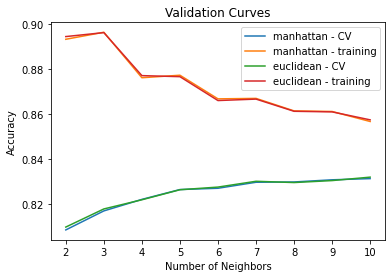

In [17]:
plt.plot(n_neighbors, manhattan['mean_test_score'], label='manhattan - CV')
plt.plot(n_neighbors, manhattan['mean_train_score'],  label='manhattan - training')
plt.plot(n_neighbors, euclidean['mean_test_score'], label='euclidean - CV')
plt.plot(n_neighbors, euclidean['mean_train_score'], label='euclidean - training')
plt.legend(loc='best')
plt.title('Validation Curves')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.show()

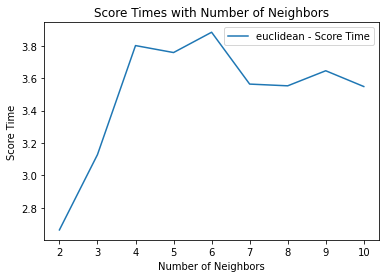

In [14]:
# plt.plot(n_neighbors, manhattan['mean_score_time'], label='manhattan - CV')
plt.plot(n_neighbors, euclidean['mean_score_time'], label='euclidean - Score Time')
plt.legend(loc='best')
plt.title('Score Times with Number of Neighbors')
plt.ylabel('Score Time')
plt.xlabel('Number of Neighbors')
plt.show()

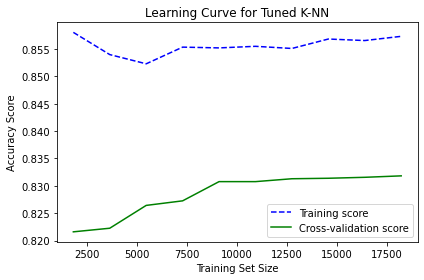

In [6]:
best_model = KNeighborsClassifier(metric='euclidean', n_neighbors=10)
plot.plot_learning_curve(best_model, X_train_norm, y_train, title='Learning Curve for Tuned K-NN')

In [24]:
best_model.fit(X_train_norm, y_train)
y_test_pred = best_model.predict(X_test_norm)
accuracy_score(y_test, y_test_pred)

0.8318149247620023

In [20]:
basic = KNeighborsClassifier()
n_neighbors = range(2,11)
weights = ['uniform', 'distance']
param_grid = dict(weights=weights, n_neighbors=n_neighbors)
weights_grid = GridSearchCV(estimator=basic, param_grid=param_grid, return_train_score=True)
weights_grid_result = weights_grid.fit(X_train_norm, y_train)

In [21]:
weights_res = weights_grid_result.cv_results_
weights_res_df = helpers.scikit_cv_result_to_df(weights_res)
weights_res_df.sort_values(by='rank_test_score')

,,mean_fit_time,std_fit_time,mean_score_time,std_score_time,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
n_neighbors,weights,,,,,,,,,
10,uniform,0.006512,0.000363,1.604242,0.074985,0.831827,0.006761,1,0.857351,0.001274
9,uniform,0.006344,0.000556,1.580665,0.066799,0.830291,0.005249,2,0.860905,0.002209
7,uniform,0.006251,0.000501,1.561229,0.029747,0.829984,0.004483,3,0.866598,0.002030
8,uniform,0.005949,0.000726,1.563784,0.034738,0.829414,0.004414,4,0.861168,0.001746
6,uniform,0.006361,0.000548,1.566221,0.021324,0.827396,0.005050,5,0.865951,0.001207
5,uniform,0.006693,0.001289,1.541585,0.028582,0.826211,0.004392,6,0.876590,0.000726
10,distance,0.006893,0.000686,1.487082,0.050557,0.825597,0.006985,7,1.000000,0.000000
9,distance,0.007023,0.000633,1.484394,0.043344,0.822657,0.006473,8,1.000000,0.000000
8,distance,0.007011,0.000706,1.449934,0.037995,0.822482,0.006613,9,1.000000,0.000000


In [22]:
joblib.dump(res_df, 'adult_knn_grid_cv_res_df_weights_neighbors.pkl')

['adult_knn_grid_cv_res_df_weights_neighbors.pkl']

In [25]:
best_weights_model = KNeighborsClassifier(weights='uniform', n_neighbors=10)
best_weights_model.fit(X_train_norm, y_train)
y_test_pred = best_model.predict(X_test_norm)
accuracy_score(y_test, y_test_pred)

0.8318149247620023

In [28]:
uniform = weights_res_df.xs('uniform', level='weights')
distance = weights_res_df.xs('distance', level='weights')

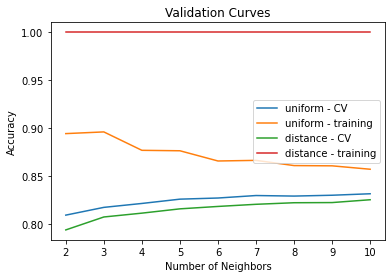

In [29]:
plt.plot(n_neighbors, uniform['mean_test_score'], label='uniform - CV')
plt.plot(n_neighbors, uniform['mean_train_score'],  label='uniform - training')
plt.plot(n_neighbors, distance['mean_test_score'], label='distance - CV')
plt.plot(n_neighbors, distance['mean_train_score'], label='distance - training')
plt.legend(loc='best')
plt.title('Validation Curves')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.show()